In [49]:
class Line:
    def __init__(self, m, n):
        self.m = m
        self.n = n

    def __call__(self, x):
        return self.m * x + self.n

import math

def angle_between_lines(line1, line2):
    """
    Calculate the angle between two lines.
    
    :param line1: First line (Line class instance).
    :param line2: Second line (Line class instance).
    :return: Angle in degrees between the two lines.
    """
    m1, m2 = line1.m, line2.m
    
    if (1 + m1 * m2) == 0:
        return 90.0
    
    angle_rad = math.atan(abs((m1 - m2) / (1 + m1 * m2)))
    angle_deg = math.degrees(angle_rad)
    
    return angle_deg

# Example usage
line1 = Line(1, 0)  # y = x
line2 = Line(-1, 0)  # y = -x
angle = angle_between_lines(line1, line2)
print(f"The angle between the lines is {angle} degrees.")


The angle between the lines is 90.0 degrees.


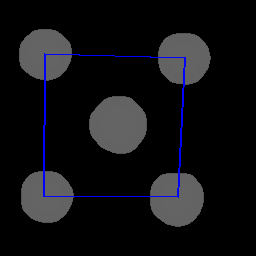

In [50]:
from PIL import Image, ImageDraw
import IPython.display as display

background_image_path = "image.png"
ox1 = [44, 185, 178, 43]
oy1 = [53, 57, 197, 196]

area_coords= list(zip(ox1, oy1))
img = Image.open(background_image_path)

img = Image.open(background_image_path)
draw = ImageDraw.Draw(img)

# Draw the area boundary
draw.polygon(area_coords, outline="blue", fill=None, width=2)

display.display(img)

In [51]:
def get_line_from_two_points(p1, p2):
    if p1[0] == p2[0]:  # Vertical line
        raise ValueError("Vertical line - slope is undefined.")
    m = (p2[1] - p1[1]) / (p2[0] - p1[0])
    n = p1[1] - m * p1[0]
    return Line(m, n)

def is_point_in_polygon(point, polygon):
    x, y = point
    n = len(polygon)
    inside = False

    p1x, p1y = polygon[0]
    for i in range(n + 1):
        p2x, p2y = polygon[i % n]
        if y > min(p1y, p2y):
            if y <= max(p1y, p2y):
                if x <= max(p1x, p2x):
                    if p1y != p2y:
                        xinters = (y - p1y) * (p2x - p1x) / (p2y - p1y) + p1x
                    if p1x == p2x or x <= xinters:
                        inside = not inside
        p1x, p1y = p2x, p2y

    return inside

import math

def get_point_given_distance(distance, line, origin, area):
    # Calculate the two possible points at the given distance
    dx = distance / math.sqrt(1 + line.m ** 2)
    dy = line.m * dx

    point1 = [origin[0] + dx, origin[1] + dy]
    point2 = [origin[0] - dx, origin[1] - dy]

    if is_point_in_polygon(point1, area):
        return point1
    if is_point_in_polygon(point2, area):
        return point2

    return None  # This should not happen if distance is correct and within bounds

def generate_parallel_line(line, point):
    """
    Generate a line parallel to the given line that passes through the given point.

    :param line: Line class instance representing the original line.
    :param point: Tuple (x, y) representing the point through which the new line passes.
    :return: Line class instance representing the new parallel line.
    """
    m = line.m
    x, y = point
    n = y - m * x
    return Line(m, n)

def intersection_point(line1, line2):
    """
    Calculate the intersection point between two lines.

    :param line1: First line (Line class instance).
    :param line2: Second line (Line class instance).
    :return: Tuple (x, y) representing the intersection point.
    """
    m1, n1 = line1.m, line1.n
    m2, n2 = line2.m, line2.n
    
    if m1 == m2:
        raise ValueError("The lines are parallel and do not intersect.")
    
    x = (n2 - n1) / (m1 - m2)
    y = m1 * x + n1
    
    return [x, y]

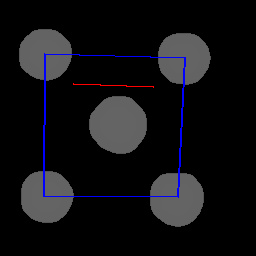

In [52]:
def get_line_from_two_points(p1, p2):
    if p1[0] == p2[0]:  # Vertical line
        raise ValueError("Vertical line - slope is undefined.")
    m = (p2[1] - p1[1]) / (p2[0] - p1[0])
    n = p1[1] - m * p1[0]
    return Line(m, n)

def is_point_in_polygon(point, polygon):
    x, y = point
    n = len(polygon)
    inside = False

    p1x, p1y = polygon[0]
    for i in range(n + 1):
        p2x, p2y = polygon[i % n]
        if y > min(p1y, p2y):
            if y <= max(p1y, p2y):
                if x <= max(p1x, p2x):
                    if p1y != p2y:
                        xinters = (y - p1y) * (p2x - p1x) / (p2y - p1y) + p1x
                    if p1x == p2x or x <= xinters:
                        inside = not inside
        p1x, p1y = p2x, p2y

    return inside

import math



def get_point_given_distance(distance, line, origin, reference_point):
    """
    Calculate the point at a given distance along a line from the origin point,
    and return the point closest to the given reference point.
    
    :param distance: Distance to travel along the line.
    :param line: Line class instance representing the line.
    :param origin: Tuple (x, y) representing the starting point.
    :param reference_point: Tuple (x, y) representing the point to which the closest point is determined.
    :return: Tuple (x, y) representing the point closest to the reference point.
    """
    # Calculate the two possible points at the given distance
    dx = distance / math.sqrt(1 + line.m ** 2)
    dy = line.m * dx

    point1 = (origin[0] + dx, origin[1] + dy)
    point2 = (origin[0] - dx, origin[1] - dy)

    dist1 = math.sqrt((point1[0] - reference_point[0]) ** 2 + (point1[1] - reference_point[1]) ** 2)
    dist2 = math.sqrt((point2[0] - reference_point[0]) ** 2 + (point2[1] - reference_point[1]) ** 2)

    # Return the point that is closer to the reference point
    if dist1 < dist2:
        return point1
    else:
        return point2

def generate_parallel_line(line, point):
    """
    Generate a line parallel to the given line that passes through the given point.

    :param line: Line class instance representing the original line.
    :param point: Tuple (x, y) representing the point through which the new line passes.
    :return: Line class instance representing the new parallel line.
    """
    m = line.m
    x, y = point
    n = y - m * x
    return Line(m, n)

def intersection_point(line1, line2):
    """
    Calculate the intersection point between two lines.

    :param line1: First line (Line class instance).
    :param line2: Second line (Line class instance).
    :return: Tuple (x, y) representing the intersection point.
    """
    m1, n1 = line1.m, line1.n
    m2, n2 = line2.m, line2.n
    
    if m1 == m2:
        raise ValueError("The lines are parallel and do not intersect.")
    
    x = (n2 - n1) / (m1 - m2)
    y = m1 * x + n1
    
    return [x, y]

diameter=30 #Diametro
## Obtener lineas de la area
Ltop = get_line_from_two_points([ox1[0],oy1[0]], [ox1[1], oy1[1]])
LRight = get_line_from_two_points([ox1[1],oy1[1]], [ox1[2], oy1[2]])
LBot = get_line_from_two_points([ox1[2],oy1[2]], [ox1[3], oy1[3]])
LLeft = get_line_from_two_points([ox1[3],oy1[3]], [ox1[0], oy1[0]])

## Obtener puntos dentro de las lineas para conseguir rectas generadoras
Pi1=get_point_given_distance(diameter, Ltop, [ox1[0],oy1[0]], [ox1[3],oy1[3]])
Pi2=get_point_given_distance(diameter, LLeft, [ox1[0],oy1[0]], [ox1[3],oy1[3]])
Pi3=get_point_given_distance(diameter, Ltop, [ox1[1],oy1[1]], [ox1[2],oy1[2]])

## Rectas generadoras
Li1=generate_parallel_line(LLeft, Pi1)
Li2=generate_parallel_line(Ltop, Pi2)
Li3=generate_parallel_line(LRight, Pi3)

## Obtener puntos de la primera recta con el cru
P1=intersection_point(Li1, Li2)
P2=intersection_point(Li2, Li3)

solution=[tuple(P1), tuple(P2)]

draw.line(solution, fill="red", width=2)
display.display(img)

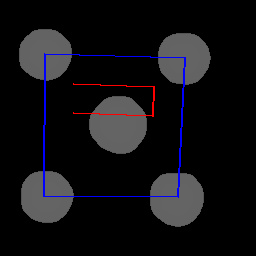

In [53]:
# P3 a partir de la recta paralela a LLeft
P3=get_point_given_distance(diameter, Li3, P2, [ox1[2],oy1[2]])
solution.append(tuple(P3))
# Fem el mateix per a P4
P4=get_point_given_distance(diameter, Li1, P1, [ox1[2],oy1[2]])
solution.append(tuple(P4))

draw.line(solution, fill="red", width=2)
display.display(img)

In [54]:
def get_area_lines(ox, oy):
    ## Obtener lineas de la area
    Ltop = get_line_from_two_points([ox[0],oy1[0]], [ox[1], oy[1]])
    LRight = get_line_from_two_points([ox[1],oy1[1]], [ox[2], oy[2]])
    LBot = get_line_from_two_points([ox[2],oy1[2]], [ox[3], oy[3]])
    LLeft = get_line_from_two_points([ox[3],oy1[3]], [ox[0], oy[0]])
    return Ltop, LRight, LBot, LLeft


solution=[]


## Obtener puntos dentro de las lineas para conseguir rectas generadoras
Pi1=get_point_given_distance(diameter, Ltop, [ox1[0],oy1[0]], [ox1[3],oy1[3]])
Pi2=get_point_given_distance(diameter, LLeft, [ox1[0],oy1[0]], [ox1[3],oy1[3]])
Pi3=get_point_given_distance(diameter, Ltop, [ox1[1],oy1[1]], [ox1[2],oy1[2]])

## Rectas generadoras
Li1=generate_parallel_line(LLeft, Pi1)
Li2=generate_parallel_line(Ltop, Pi2)
Li3=generate_parallel_line(LRight, Pi3)

## Obtener puntos de la primera recta con el cru
P1=intersection_point(Li1, Li2)
P2=intersection_point(Li2, Li3)

[(73.77815037381214, 83.84998806787007),
 (153.5139286690085, 86.11199596276815),
 (152.01580016069173, 116.07456612910349),
 (73.56836529342962, 113.8492545625704)]